<a href="https://colab.research.google.com/github/jmmarinr/ComputationalMethods/blob/master/Interpolacion/Lineal_Lagrange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sympy import symbols, sin, cos, lambdify, diff, expand, simplify

# Interpolación Numérica

---

### Profesor: Juan Marcos Marín

---

La **interpolación numérica** es una técnica matemática utilizada para estimar valores intermedios entre puntos conocidos de una función o conjunto de datos. La idea principal es construir una función (o polinomio) a partir de los datos dados que se aproxime a la función original que los creó, la interpolación también se usa para la aproximación de una función complicada por una más simple de calcular, así ahorrando tiempo de computación.

## Métodos de Interpolación

Existen varios métodos de interpolación, entre los que destacan:

1. **Interpolación Lineal**:
   - Se utiliza para aproximar valores entre dos puntos conocidos.
2. **Interpolación Polinómica**:
   - Se basa en la construcción de un polinomio que pase por todos los puntos dados.
   - El método más común es el de Lagrange, que utiliza polinomios de Lagrange para interpolar.
   - Otro método es el de Newton, que utiliza diferencias divididas.

3. **Splines Cúbicos**:
   - Divide el dominio en segmentos y ajusta polinomios cúbicos a cada segmento.
   - Garantiza continuidad y suavidad en la interpolación.

## Teorema de aproximación de Weierstrass
 Suponga que $f(x)$ es definida y continua en $[a,b]$, entonces, para cada $\varepsilon > 0$
 existe un Polinomio $P(x)$ con la propiedad que,

 $$|f (x) − P(x)| < \varepsilon,$$    
        
para todo $x$ en $[a,b]$. En otras palabras, este teorema garantiza que se puede remplazar la función original por un polinomio; el cuál es más simple de calcular.

# Interpolación Lineal

La **interpolación lineal** es un método matemático utilizado para estimar valores desconocidos que se encuentran entre dos puntos conocidos en una función o conjunto de datos. Es una técnica fundamental en diversas áreas como la ingeniería, las ciencias físicas, la economía y la informática.

## Fórmula de la Interpolación Lineal

La fórmula de la interpolación lineal entre dos puntos $ (x_0, y_0) $ y $ (x_1, y_1) $ para encontrar un valor $ y $ correspondiente a un valor $ x $ dado es:

$$
y = y_0 + \frac{(y_1 - y_0)}{(x_1 - x_0)} \times (x - x_0)
$$

Donde:
- $ x $ es el valor para el cual se desea encontrar $ y $.
- $ (x_0, y_0) $ y $ (x_1, y_1) $ son los puntos conocidos.


La interpolación lineal es esencial por varias razones:

- **Simplicidad**: Es fácil de entender e implementar, lo que la hace accesible para una amplia gama de aplicaciones.
- **Eficiencia Computacional**: Requiere pocos cálculos, lo que es beneficioso para aplicaciones en tiempo real.
- **Versatilidad**: Se puede aplicar en múltiples disciplinas, desde gráficos por computadora hasta análisis de datos.

## Ejemplo de Implementación

Supongamos que tenemos dos puntos conocidos:
- Punto A: $ (2, 4) $
- Punto B: $ (5, 10) $

Queremos encontrar el valor de $ y $ cuando $ x = 3 $.

Aplicando la fórmula de interpolación lineal:

$$
f(x) = 4 + \frac{(10 - 4)}{(5 - 2)} \times (3 - 2) = 4 + \frac{6}{3} \times 1 = 4 + 2 = 6
$$

Por lo tanto, cuando $ x = 3 $, $ f(x) = 6 $.




In [14]:
def Lineal(x0, x1, y0, y1, x):
  '''
  Encuentra la interpolación lineal entre dos puntos.
  Entradas:
    x0: float, coordenada x del primer punto.
    x1: float, coordenada x del segundo punto.
    y0: float, coordenada y del primer punto.
    y1: float, coordenada y del segundo punto.
    x : float o array, coordenada x del punto interpolado.
  Retorna:
    y: float o array, coordenada y del punto interpolado.
  '''
  if x0 == x1:
    raise ValueError('x0 y x1 no pueden ser iguales')
  if min(x) < x0 or max(x) > x1:
      raise ValueError('x no está entre x0 y x1')
  y = y0 + (y1 - y0) / (x1 - x0) * (x - x0)
  return y


### Ejemplo

Conociendo (1, 2) y (2, 4) encuentre la función de interpolación lineal para un $x$ en dicho intervalo

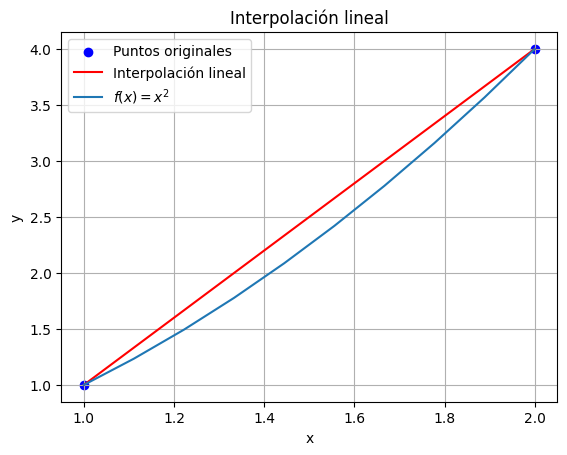

In [15]:
x0, y0 = 1, 1
x1, y1 = 2, 4
x = np.linspace(x0, x1, 10)

y = Lineal(x0, x1, y0, y1, x)

plt.scatter([x0, x1], [y0, y1], color='b', label = 'Puntos originales')
plt.plot(x, Lineal(x0, x1, y0, y1, x), 'r-', label = 'Interpolación lineal')
plt.plot(x, x**2, label = '$f(x)= x^2$')
plt.title('Interpolación lineal')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()


### Error en la interpolación lineal

Sea $f(x)$ una función suficientemente suave (al menos dos veces derivable) y sean $x_0$ y $x_1$ dos puntos tales que $x \in [x_0, x_1]$. Entonces, el error de la interpolación lineal $L(x)$ de $f(x)$ en el punto $x$ está dado por:

$$
E(x) = f(x) - L(x) = -\frac{(x - x_0)(x - x_1)}{2} f''(\xi)
$$

donde $\xi$ es algún punto en el intervalo $(x_0, x_1)$.

### Forma acotada del error

Si se conoce una cota superior para la segunda derivada de $f(x)$ en el intervalo $[x_0, x_1]$, es posible acotar el valor absoluto del error de interpolación como:

$$
|E(x)| \leq \frac{|(x - x_0)(x - x_1)|}{2} \cdot \max_{\xi \in [x_0, x_1]} |f''(\xi)|
$$

Esta expresión permite estimar el máximo posible del error de interpolación lineal dentro del intervalo considerado.


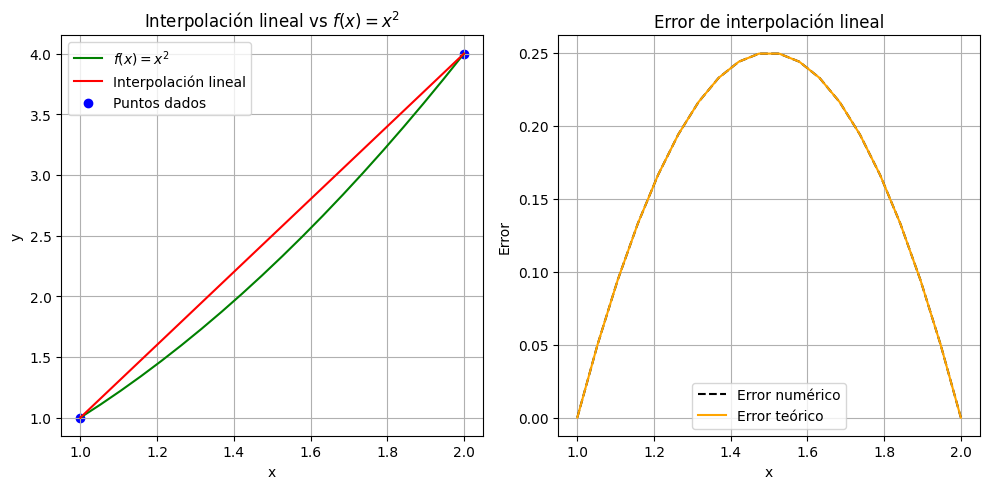

In [17]:
# Datos
x0, y0 = 1, 1
x1, y1 = 2, 4

# Puntos a interpolar
x = np.linspace(x0, x1, 20)

# Interpolación lineal
y_interp = Lineal(x0, x1, y0, y1, x)

# Función original
f = lambda x: x**2
y_exact = f(x)

# Error exacto (función - interpolación)
error_numerico = abs(y_exact - y_interp)

# Error teórico: f''(x) = 2 para f(x) = x^2
fpp = 2
error_teorico = -0.5 * (x - x0) * (x - x1) * fpp

# Gráficas
plt.figure(figsize=(10,5))

# Interpolación vs función
plt.subplot(1,2,1)
plt.plot(x, y_exact, label='$f(x) = x^2$', color='green')
plt.plot(x, y_interp, label='Interpolación lineal', color='red')
plt.scatter([x0, x1], [y0, y1], color='blue', label='Puntos dados')
plt.title('Interpolación lineal vs $f(x)=x^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

# Error
plt.subplot(1,2,2)
plt.plot(x, error_numerico, label='Error numérico', color='black', linestyle='--')
plt.plot(x, error_teorico, label='Error teórico', color='orange')
plt.title('Error de interpolación lineal')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


## Interpolación de Lagrange

La **interpolación de Lagrange** es un método clásico para encontrar un polinomio de grado $n$ que interpola una función dada en $n+1$ puntos distintos. Es una técnica **no iterativa** y **constructiva**, lo que significa que permite escribir explícitamente el polinomio interpolante sin resolver sistemas de ecuaciones.

Dado un conjunto de $n+1$ puntos $\{(x_0, y_0), (x_1, y_1), \dots, (x_n, y_n)\}$ con $x_i \ne x_j$ si $i \ne j$, el **polinomio interpolante de Lagrange** $P_n(x)$ es:

$$
P_n(x) = \sum_{i=0}^{n} y_i \cdot \ell_i(x)
$$

donde cada $\ell_i(x)$ es el **polinomio base de Lagrange**, definido como:

$$
\ell_i(x) = \prod_{\substack{j=0 \\ j \ne i}}^{n} \frac{x - x_j}{x_i - x_j}
$$

Este polinomio satisface:

$$
P_n(x_i) = y_i \quad \text{para cada } i = 0, 1, \dots, n
$$


- Permite aproximar funciones desconocidas a partir de un conjunto finito de datos tabulados.
- El método es exacto si la función original es un polinomio de grado $\le n$.


### Ejemplo

Consideremos los siguientes puntos:

- $(1, 1)$
- $(2, 4)$
- $(3, 9)$


El polinomio de Lagrange $P(x)$ se define como:

$$
P(x) = \sum_{i=0}^{n} y_i L_i(x)
$$

donde los polinomios de Lagrange $L_i(x)$ se definen como:

$$
L_i(x) = \prod_{\substack{j=0 \\ j \neq i}}^{n} \frac{x - x_j}{x_i - x_j}
$$


1. **Para $L_0(x)$**:

   $$
   L_0(x) = \frac{(x - 2)(x - 3)}{(1 - 2)(1 - 3)} = \frac{(x - 2)(x - 3)}{(-1)(-2)} = \frac{(x - 2)(x - 3)}{2}
   $$

2. **Para $L_1(x)$**:

   $$
   L_1(x) = \frac{(x - 1)(x - 3)}{(2 - 1)(2 - 3)} = \frac{(x - 1)(x - 3)}{(1)(-1)} = -(x - 1)(x - 3)
   $$

3. **Para $L_2(x)$**:

   $$
   L_2(x) = \frac{(x - 1)(x - 2)}{(3 - 1)(3 - 2)} = \frac{(x - 1)(x - 2)}{(2)(1)} = \frac{(x - 1)(x - 2)}{2}
   $$


Ahora, usando los $y_i$:

$$
P(x) = 1 \cdot L_0(x) + 4 \cdot L_1(x) + 9 \cdot L_2(x)
$$

Sustituyendo $L_0(x)$, $L_1(x)$ y $L_2(x)$:

$$
P(x) = 1 \cdot \left(\frac{(x - 2)(x - 3)}{2}\right) + 4 \cdot \left(-(x - 1)(x - 3)\right) + 9 \cdot \left(\frac{(x - 1)(x - 2)}{2}\right)
$$

Simplificando


1. **Para $1 \cdot L_0(x)$**:
   $$
   = \frac{(x - 2)(x - 3)}{2} = \frac{x^2 - 5x + 6}{2}
   $$

2. **Para $4 \cdot L_1(x)$**:
   $$
   = 4 \cdot (-(x - 1)(x - 3)) = -4(x - 1)(x - 3) = -4(x^2 - 4x + 3) = -4x^2 + 16x - 12
   $$

3. **Para $9 \cdot L_2(x)$**:
   $$
   = 9 \cdot \left(\frac{(x - 1)(x - 2)}{2}\right) = \frac{9}{2}(x^2 - 3x + 2) = \frac{9}{2}x^2 - \frac{27}{2}x + 9
   $$


Ahora, combinamos todos los términos:

$$
P(x) = \frac{1}{2}(x^2 - 5x + 6) - 4x^2 + 16x - 12 + \left(\frac{9}{2}x^2 - \frac{27}{2}x + 9\right)
$$

Agrupando los términos de $x^2$ y $x$:

1. **Términos de $x^2$**:
   $$
   P(x) = \left(\frac{1}{2} - 4 + \frac{9}{2}\right)x^2
   $$
   $$
   = \left(\frac{1 + 9 - 8}{2}\right)x^2 = \frac{2}{2}x^2 = x^2
   $$

2. **Términos de $x$**:
   $$
   P(x) = \left(-\frac{5}{2} + 16 - \frac{27}{2}\right)x
   $$
   $$
   = \left(-\frac{5 + 27 - 32}{2}\right)x = \frac{32 - 5 - 27}{2}x = \frac{0}{2}x = 0
   $$

3. **Términos constantes**:
   $$
   P(x) = \frac{6}{2} - 12 + 9 = 3 - 12 + 9 = 0
   $$

### Polinomio Final

Así, el polinomio interpolador simplificado es:

$$
P(x) = x^2
$$

### Verificación

Ahora, verifiquemos que el polinomio $P(x) = x^2$ cumple con los puntos:

- Para $x = 1$: $P(1) = 1^2 = 1$
- Para $x = 2$: $P(2) = 2^2 = 4$
- Para $x = 3$: $P(3) = 3^2 = 9$
- Para $x = 2.5$: $P(2.5) = (2.5)^2 = 6.25$

Esto confirma que el polinomio de Lagrange que interpola los puntos dados es efectivamente $P(x) = x^2$.


Polinomios de Lagrange
L_0(x)


x**2/2 - 5*x/2 + 3

--------------------
L_1(x)


-x**2 + 4*x - 3

--------------------
L_2(x)


x**2/2 - 3*x/2 + 1

--------------------


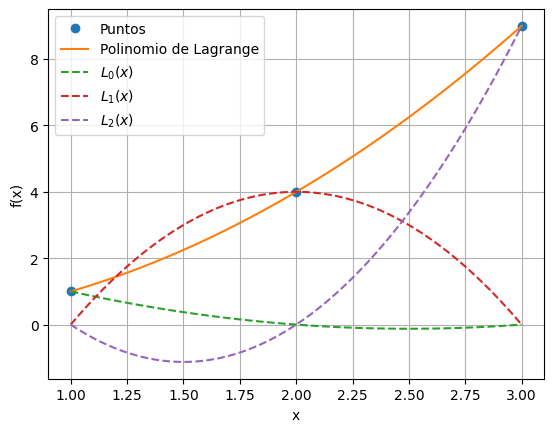

In [23]:
# Definir variables
x = symbols('x')

# Puntos dados (x_i, y_i)
puntos = [(1, 1), (2, 4), (3, 9)]  # Ejemplo de puntos

# Extraer las coordenadas x e y
x_vals = [p[0] for p in puntos]
y_vals = [p[1] for p in puntos]

# Inicializar una lista para los polinomios de Lagrange
polinomios_lagrange = []

# Generar los polinomios de Lagrange L_i(x)
for i in range(len(puntos)):
    L_i = 1
    for j in range(len(puntos)):
        if i != j:
            L_i *= (x - x_vals[j]) / (x_vals[i] - x_vals[j])

    polinomios_lagrange.append(L_i)

print('Polinomios de Lagrange')
# Mostrar cada polinomio de Lagrange
for i in range(len(puntos)):
  print(f'L_{i}(x)')
  display(expand(polinomios_lagrange[i]))
  print(5*'----')

polinomio_final = sum(L_i * y_vals[i] for i, L_i in enumerate(polinomios_lagrange))
simplify(polinomio_final)


# Convertir en funciones

L_0 = lambdify(x, polinomios_lagrange[0]*y_vals[0])
L_1 = lambdify(x, polinomios_lagrange[1]*y_vals[1])
L_2 = lambdify(x, polinomios_lagrange[2]*y_vals[2])
P = lambdify(x, polinomio_final)


# Grafica de los polinomios

x = np.array([1, 2, 3])
y = np.array([1, 4, 9])


x_vals = np.linspace(min(x_vals), max(x_vals), 100)


plt.plot(x, y, 'o', label='Puntos')
plt.plot(x_vals, P(x_vals), '-', label='Polinomio de Lagrange')
plt.plot(x_vals, L_0(x_vals), '--', label='$L_0(x)$')
plt.plot(x_vals, L_1(x_vals), '--', label='$L_1(x)$')
plt.plot(x_vals, L_2(x_vals), '--', label='$L_2(x)$')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()


In [24]:
def Lagrange(x, y, x_interp):
  '''
  Calcula el polinomio de Lagrange
  Entradas:
    x: array, coordenadas x de los puntos
    y: array, coordenadas y de los puntos
    x_interp: array, coordenadas x de los puntos a interpolar
  Retorna:
    P: array, coordenadas y de los puntos a interpolar
  '''
  if len(x) != len(y):
    raise ValueError('x e y deben tener la misma longitud')
  if min(x) > min(x_interp) or max(x) < max(x_interp):
    raise ValueError('x_interp debe estar entre x')

  n = len(x)
  P = 0
  for i in range(n):
    l = 1
    for j in range(n):
      if i != j:
        l *= (x_interp - x[j]) / (x[i] - x[j])
    P += y[i] * l
  return P

### Ejemplo

Tomemos los puntos (1, 1), (2, 4), (3, 9) y (4, 16) y hallemos el polinomio de interpolación de Lagrange.

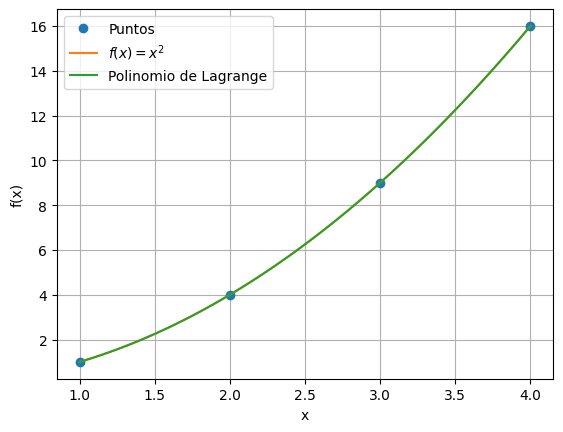

In [26]:
# Datos
x = np.array([1, 2, 3, 4])
y = np.array([1, 4, 9, 16])

# Función generadora
f = lambda x: x**2

# Puntos a interpolar
x_interp = np.linspace(min(x), max(x), 100)

# Puntos interpolados
y_interp = Lagrange(x, y, x_interp)

# Grafica
plt.plot(x, y, 'o', label='Puntos')
plt.plot(x_interp, f(x_interp), '-', label='$f(x) = x^2$')
plt.plot(x_interp, y_interp, '-', label='Polinomio de Lagrange')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()


## Error de interpolación de Lagrange

### Fórmula del error

Sea $f(x)$ una función que es $(n+1)$ veces derivable en un intervalo cerrado que contiene a los puntos $\{x_0, x_1, \dots, x_n, x\}$. Sea $P_n(x)$ el polinomio interpolante de grado $n$ obtenido mediante la interpolación de Lagrange en los nodos $\{x_0, x_1, \dots, x_n\}$. Entonces, el **error de interpolación de Lagrange** está dado por:

$$
f(x) - P_n(x) = \frac{f^{(n+1)}(\xi)}{(n+1)!} \prod_{i=0}^{n} (x - x_i)
$$

donde:

- $\xi$ es un número **dependiente de $x$**, tal que $\xi \in (x_0, x_n)$ si $x_0 < x_1 < \cdots < x_n$,
- $f^{(n+1)}(\xi)$ es la derivada de orden $(n+1)$ de $f$ evaluada en $\xi$,
- $P_n(x)$ es el polinomio interpolante de grado $n$,
- El producto $\displaystyle \prod_{i=0}^{n} (x - x_i)$ representa los desplazamientos entre $x$ y los nodos de interpolación.



### Forma acotada del error

Una forma útil para estimar el error consiste en acotar la derivada:

$$
|f(x) - P_n(x)| \le \frac{\max_{\xi \in [x_0, x_n]} |f^{(n+1)}(\xi)|}{(n+1)!} \cdot \left| \prod_{i=0}^{n} (x - x_i) \right|
$$

Esta expresión permite estimar el **peor caso** del error de interpolación dentro del intervalo de interés.




## Ejemplo

Sea la función $f(x) = 1/x$ encontremos el polinomio de Lagrange que pasa por los puntos $x_i = [0.15, 0.2, 0.3, 0.5, 0.8, 1.0, 1.4, 1.7]$

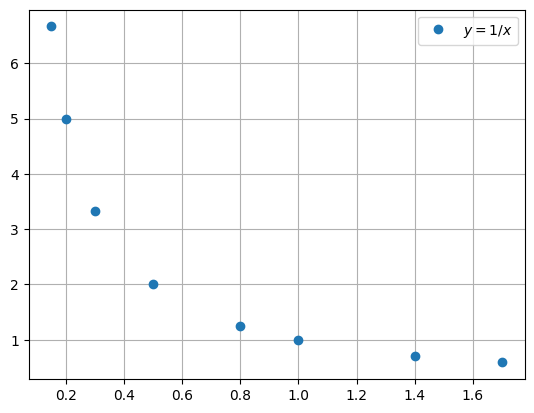

In [27]:
# Datos
x = np.array([0.15, 0.2, 0.3, 0.5, 0.8, 1.0, 1.4, 1.7])
f = lambda x: 1/x
y = f(x)
plt.plot(x, y, 'o', label = '$y=1/x$')
plt.legend()
plt.grid()
plt.show()


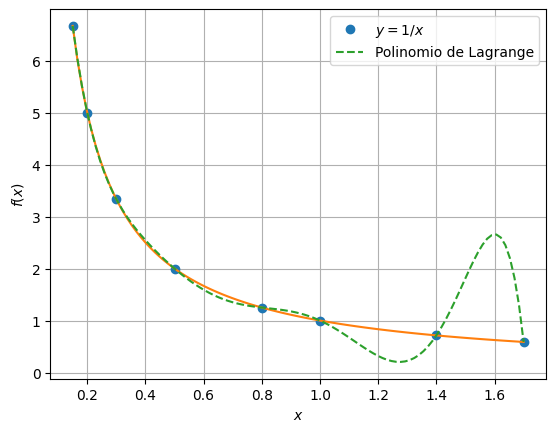

In [28]:
# Puntos a interpolar
x_interp= np.linspace(min(x), max(x), 100)
y_interp = Lagrange(x, y, x_interp)

# Grafico
plt.plot(x, y, 'o', label = '$y=1/x$')
plt.plot(x_interp, f(x_interp), '-')
plt.plot(x_interp, y_interp, '--', label = 'Polinomio de Lagrange')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid()
plt.show()

## Condición de Runge

La condición de Runge, también conocida como [fenómeno de Runge](https://es.wikipedia.org/wiki/Fen%C3%B3meno_de_Runge), es un problema que ocurre en la interpolación polinómica cuando se usan polinomios de alto grado para interpolar funciones en intervalos cerrados usando puntos equidistantes. En esencia, la condición de Runge muestra que para ciertas funciones, aumentar el grado del polinomio interpolador no siempre mejora la aproximación, y de hecho puede empeorarla significativamente, especialmente cerca de los extremos del intervalo.

Cuando los puntos de interpolación no están uniformemente distribuidos, los polinomios de Lagrange pueden exhibir fluctuaciones significativas por las siguientes razones:

1. **Sensibilidad a la distribución de puntos:**
   Los polinomios de Lagrange son muy sensibles a la ubicación de los puntos de interpolación. Una distribución no uniforme puede resultar en intervalos de tamaños muy dispares.

2. **Oscilaciones en los extremos:**
   Las fluctuaciones son especialmente pronunciadas cerca de los extremos del intervalo de interpolación.

3. **Grado del polinomio:**
   Un mayor número de puntos de interpolación resulta en un polinomio de mayor grado, lo cual tiende a aumentar las oscilaciones.

4. **Error de redondeo:**
   La distribución no uniforme puede exacerbar los errores de redondeo en los cálculos.

